In [ ]:
import numpy as np
r = np.random.random((10, 3))
print(r)
print()
print(r[np.arange(10), np.argmin(np.abs(r - 0.5), axis = 1)])

[[0.62191866 0.4311014  0.6357632 ]
 [0.54268725 0.10053213 0.44715241]
 [0.29765643 0.32066895 0.58350044]
 [0.96463885 0.24349642 0.42286902]
 [0.29205847 0.82937578 0.37368409]
 [0.74769904 0.23194869 0.23022373]
 [0.94602138 0.70375965 0.77115554]
 [0.94931298 0.8028992  0.13475343]
 [0.38600831 0.5622137  0.26162354]
 [0.66113596 0.83760412 0.70969917]]

[0.4311014  0.54268725 0.58350044 0.42286902 0.37368409 0.74769904
 0.70375965 0.8028992  0.5622137  0.66113596]


In [ ]:
import numpy as np
r = np.random.random((6, 6))
print(r)
print()
res = np.sum(r, axis = 1) / np.min(r, axis = 0)
print(res)

[[0.16331736 0.17152402 0.46190252 0.84892053 0.43915162 0.83830195]
 [0.47412417 0.53046572 0.98716919 0.78009416 0.05022293 0.75760692]
 [0.37918708 0.67451489 0.46516936 0.63951687 0.69911725 0.25562558]
 [0.79991041 0.57942681 0.77122863 0.15893496 0.85582393 0.58468138]
 [0.94563901 0.7644016  0.45024315 0.75092802 0.90005287 0.88181817]
 [0.80697672 0.54038521 0.68198394 0.93221344 0.44702979 0.47605465]]

[17.89839117 20.86986497  6.91433297 23.59459577 93.44502945 15.1966159 ]


In [ ]:
import numpy as np
r = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(r)
print()
res = np.max(r[np.roll(r == 0, 1) & (np.arange(len(r)) > 0)])
print(res)

[6 2 0 3 0 0 5 7 0]

5


In [ ]:
import numpy as np
r, j = np.ones(10), np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(r)
print()
print(j)
print()
r = r + np.bincount(j, minlength = len(r))
print(r)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

[0 1 2 3 5 5 5 8]

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [ ]:
from scipy.cluster.vq import kmeans
  
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

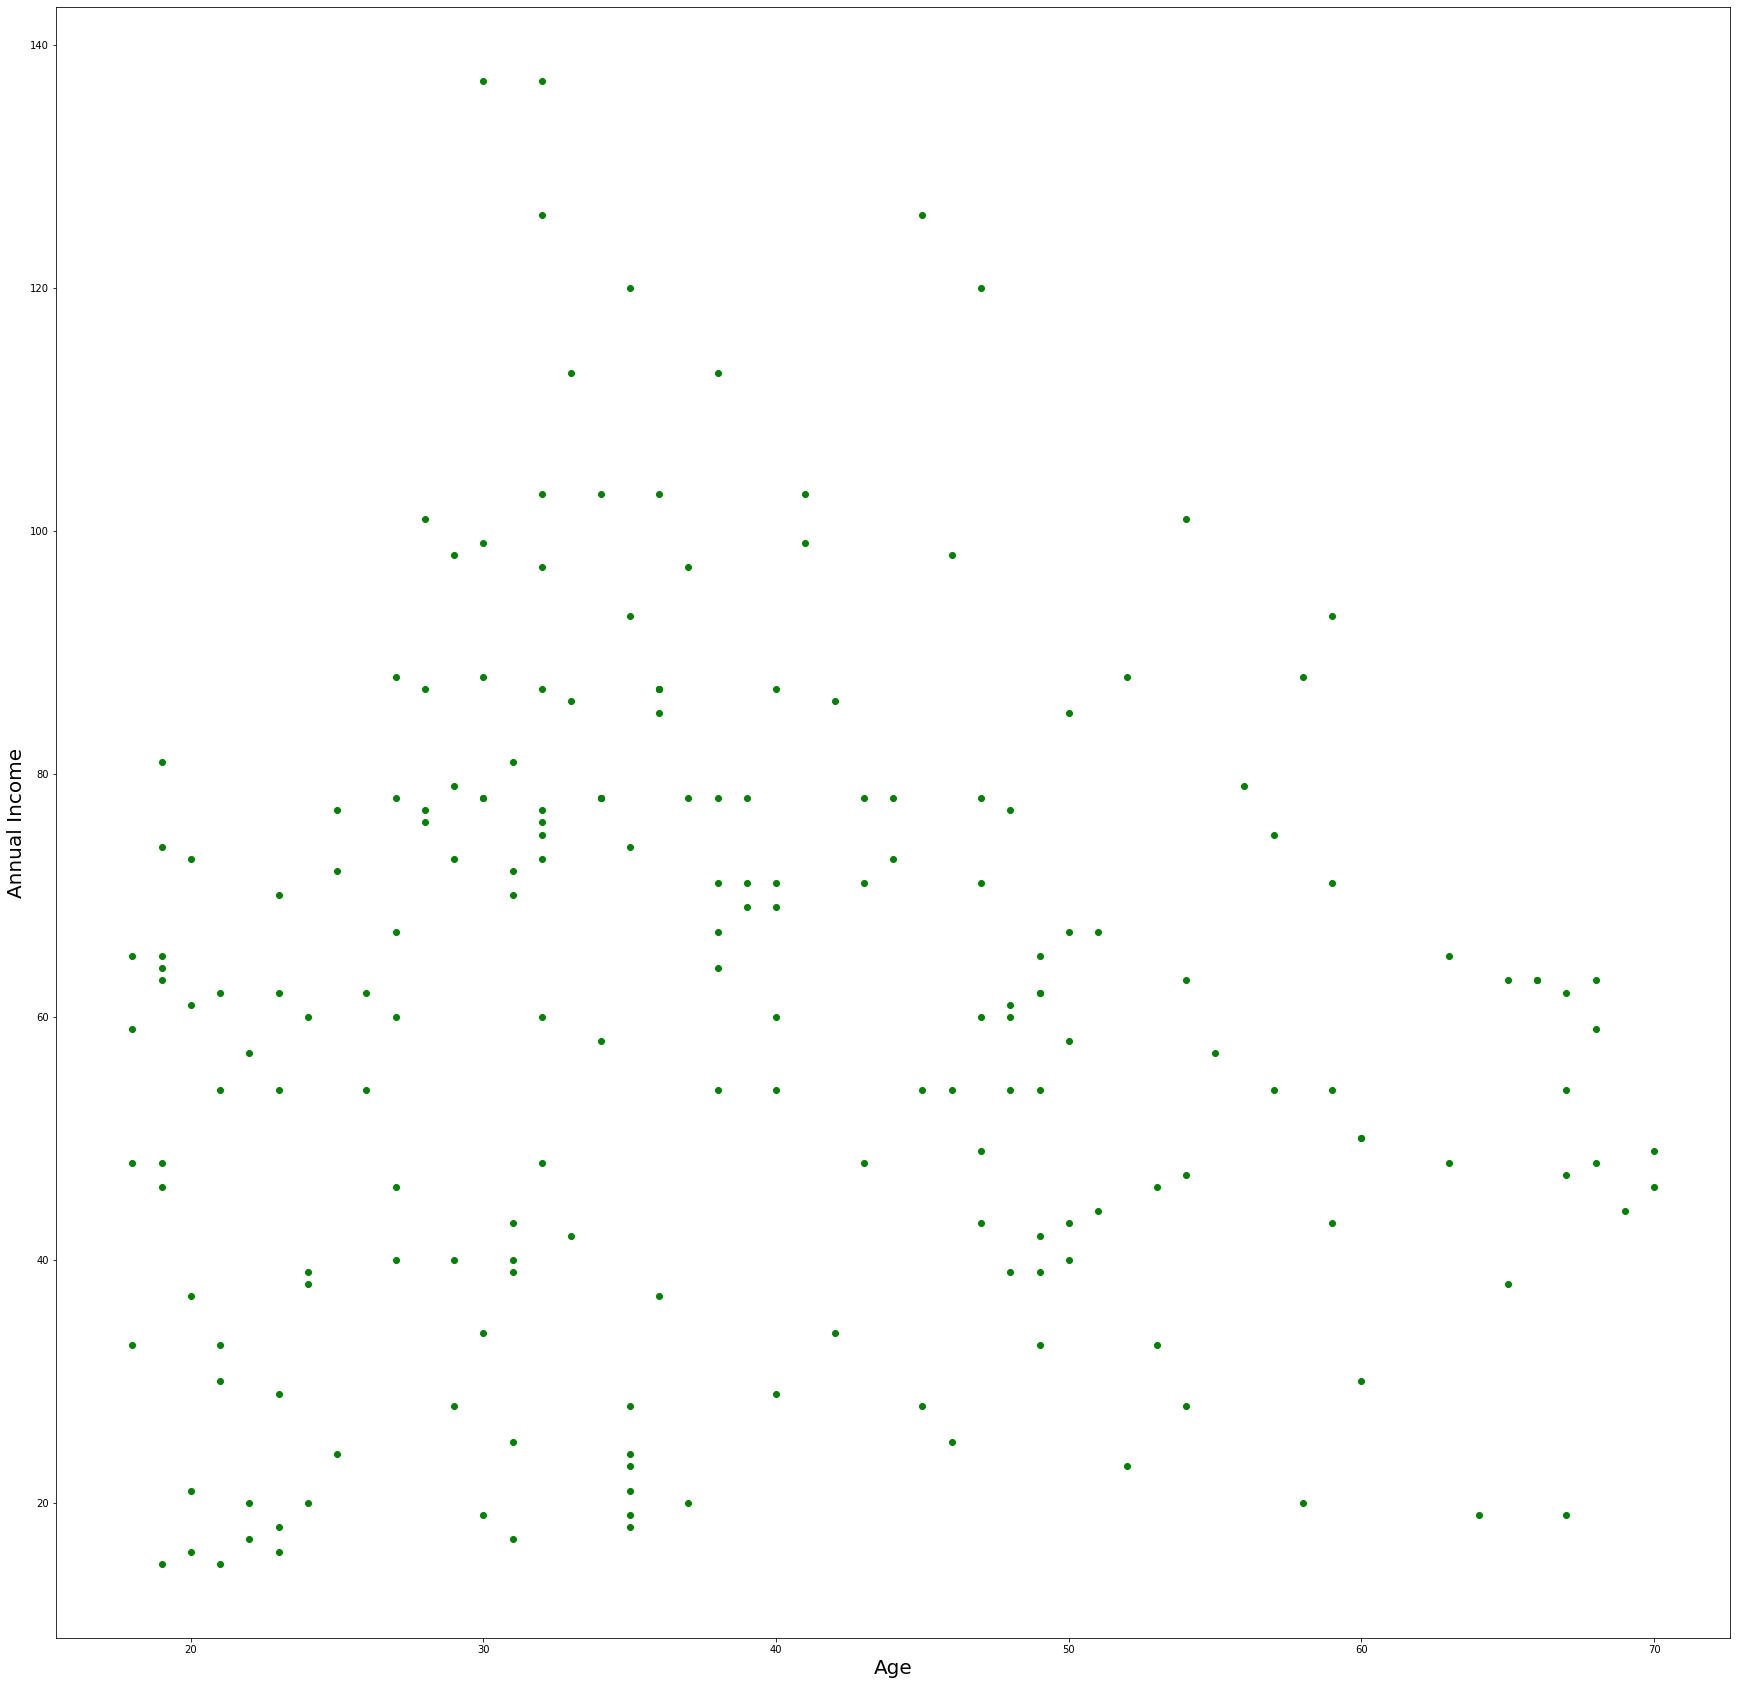

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
plt.scatter(data[:, 2], data[:, 3], color = 'green')
plt.xlabel('Age', size = '20')
plt.ylabel('Annual Income', size = '20')
plt.show()

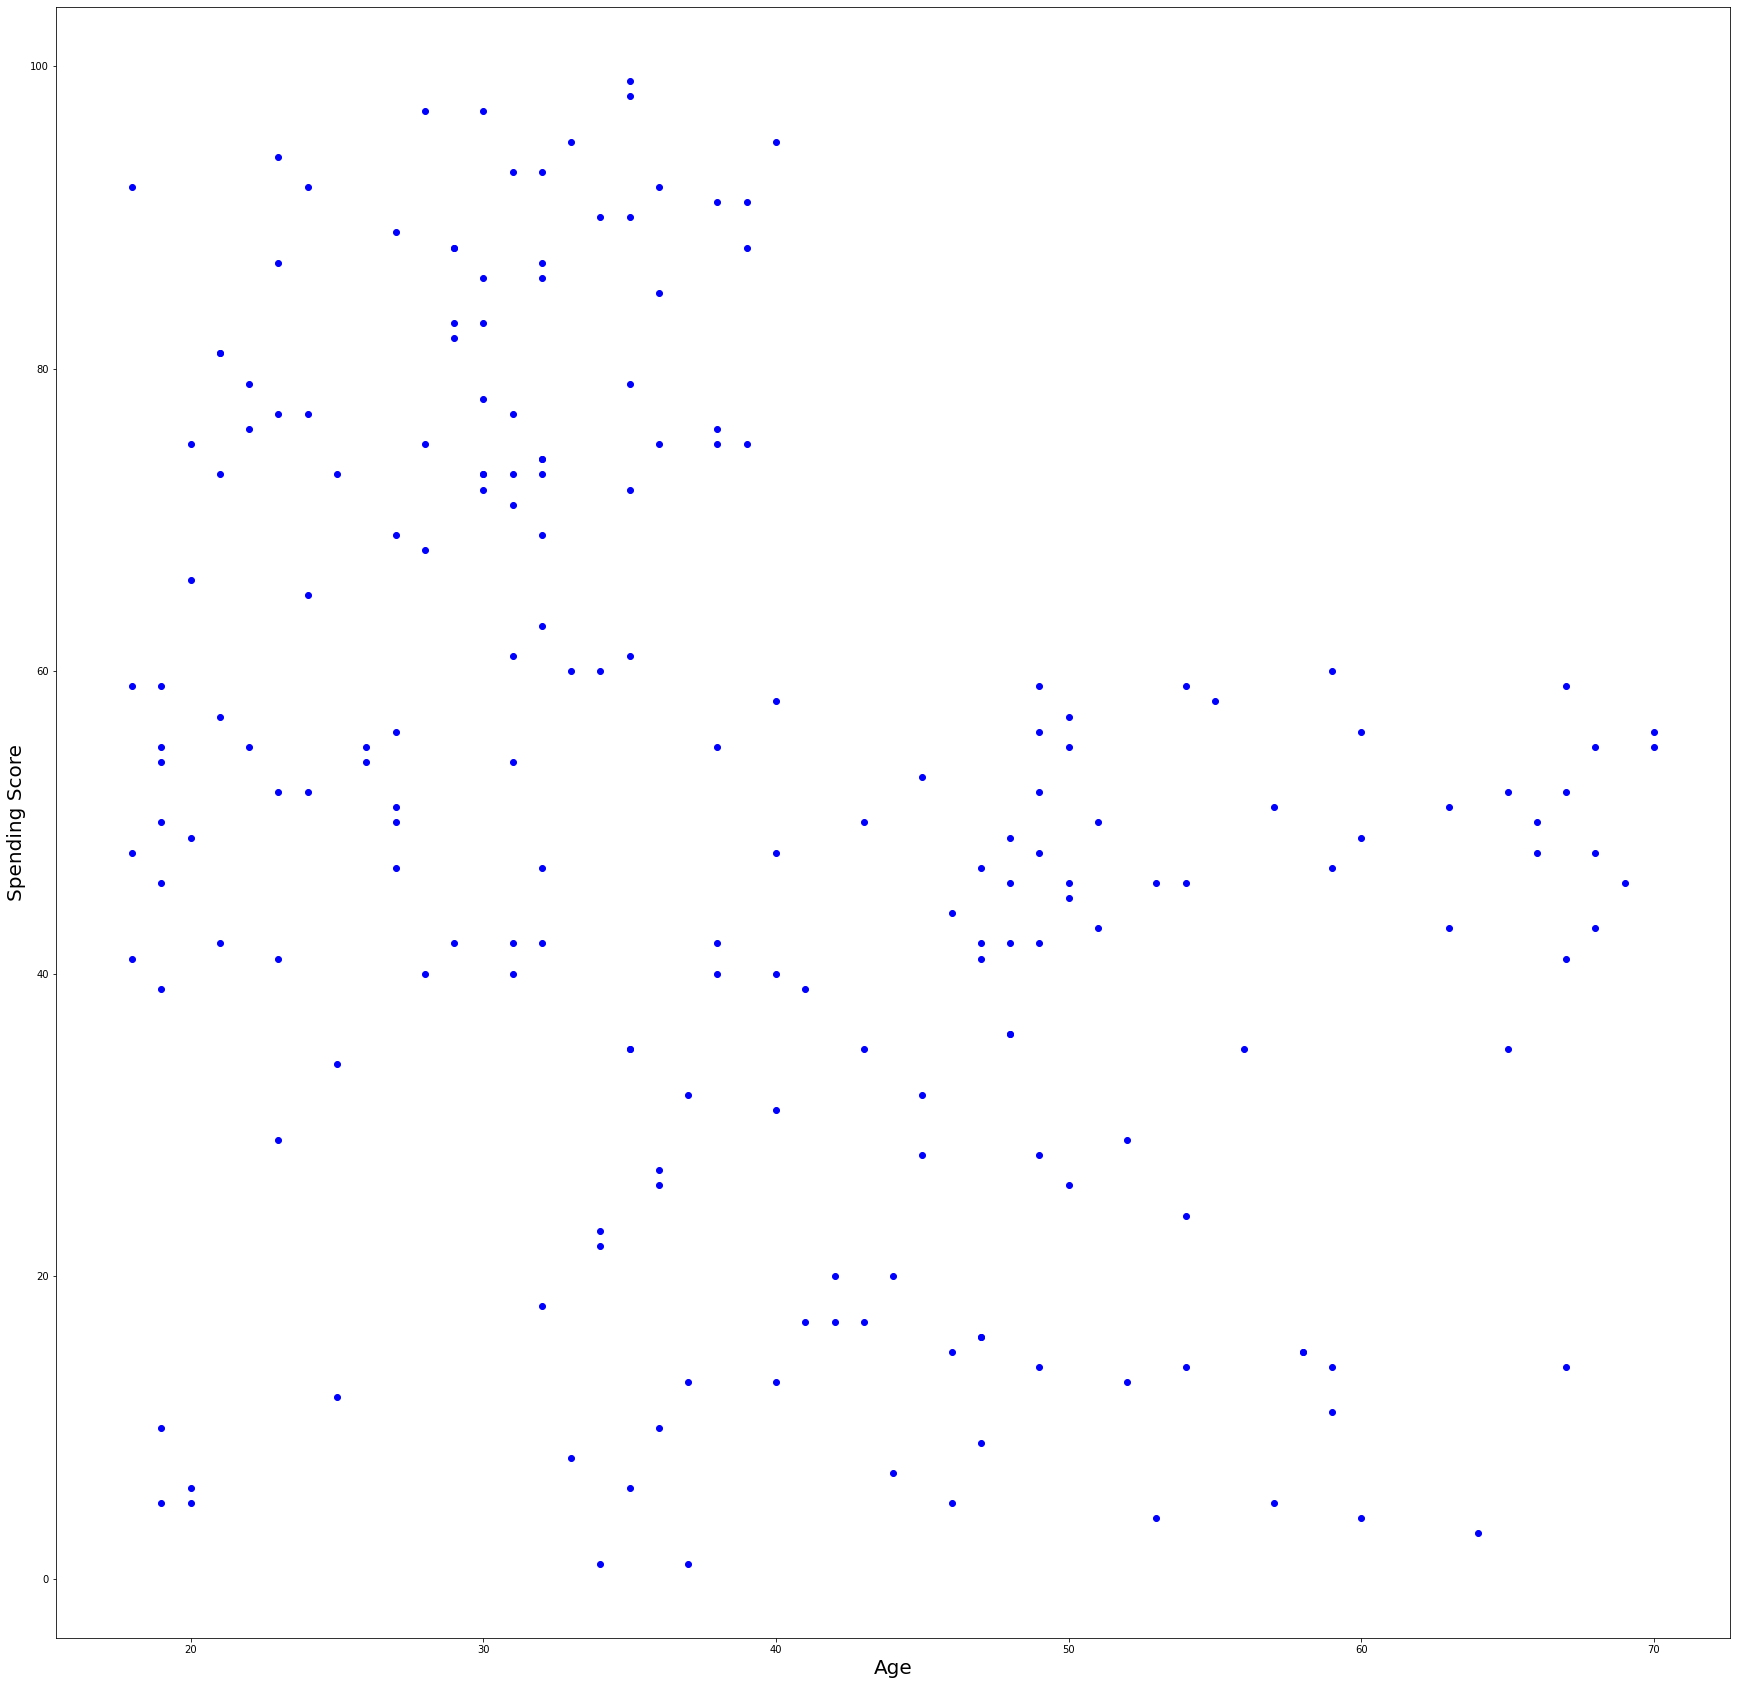

In [ ]:
plt.figure(figsize=(30,30))
plt.scatter(data[:, 2], data[:, 4], color = 'blue')
plt.xlabel('Age', size = '20')
plt.ylabel('Spending Score', size = '20')
plt.show()

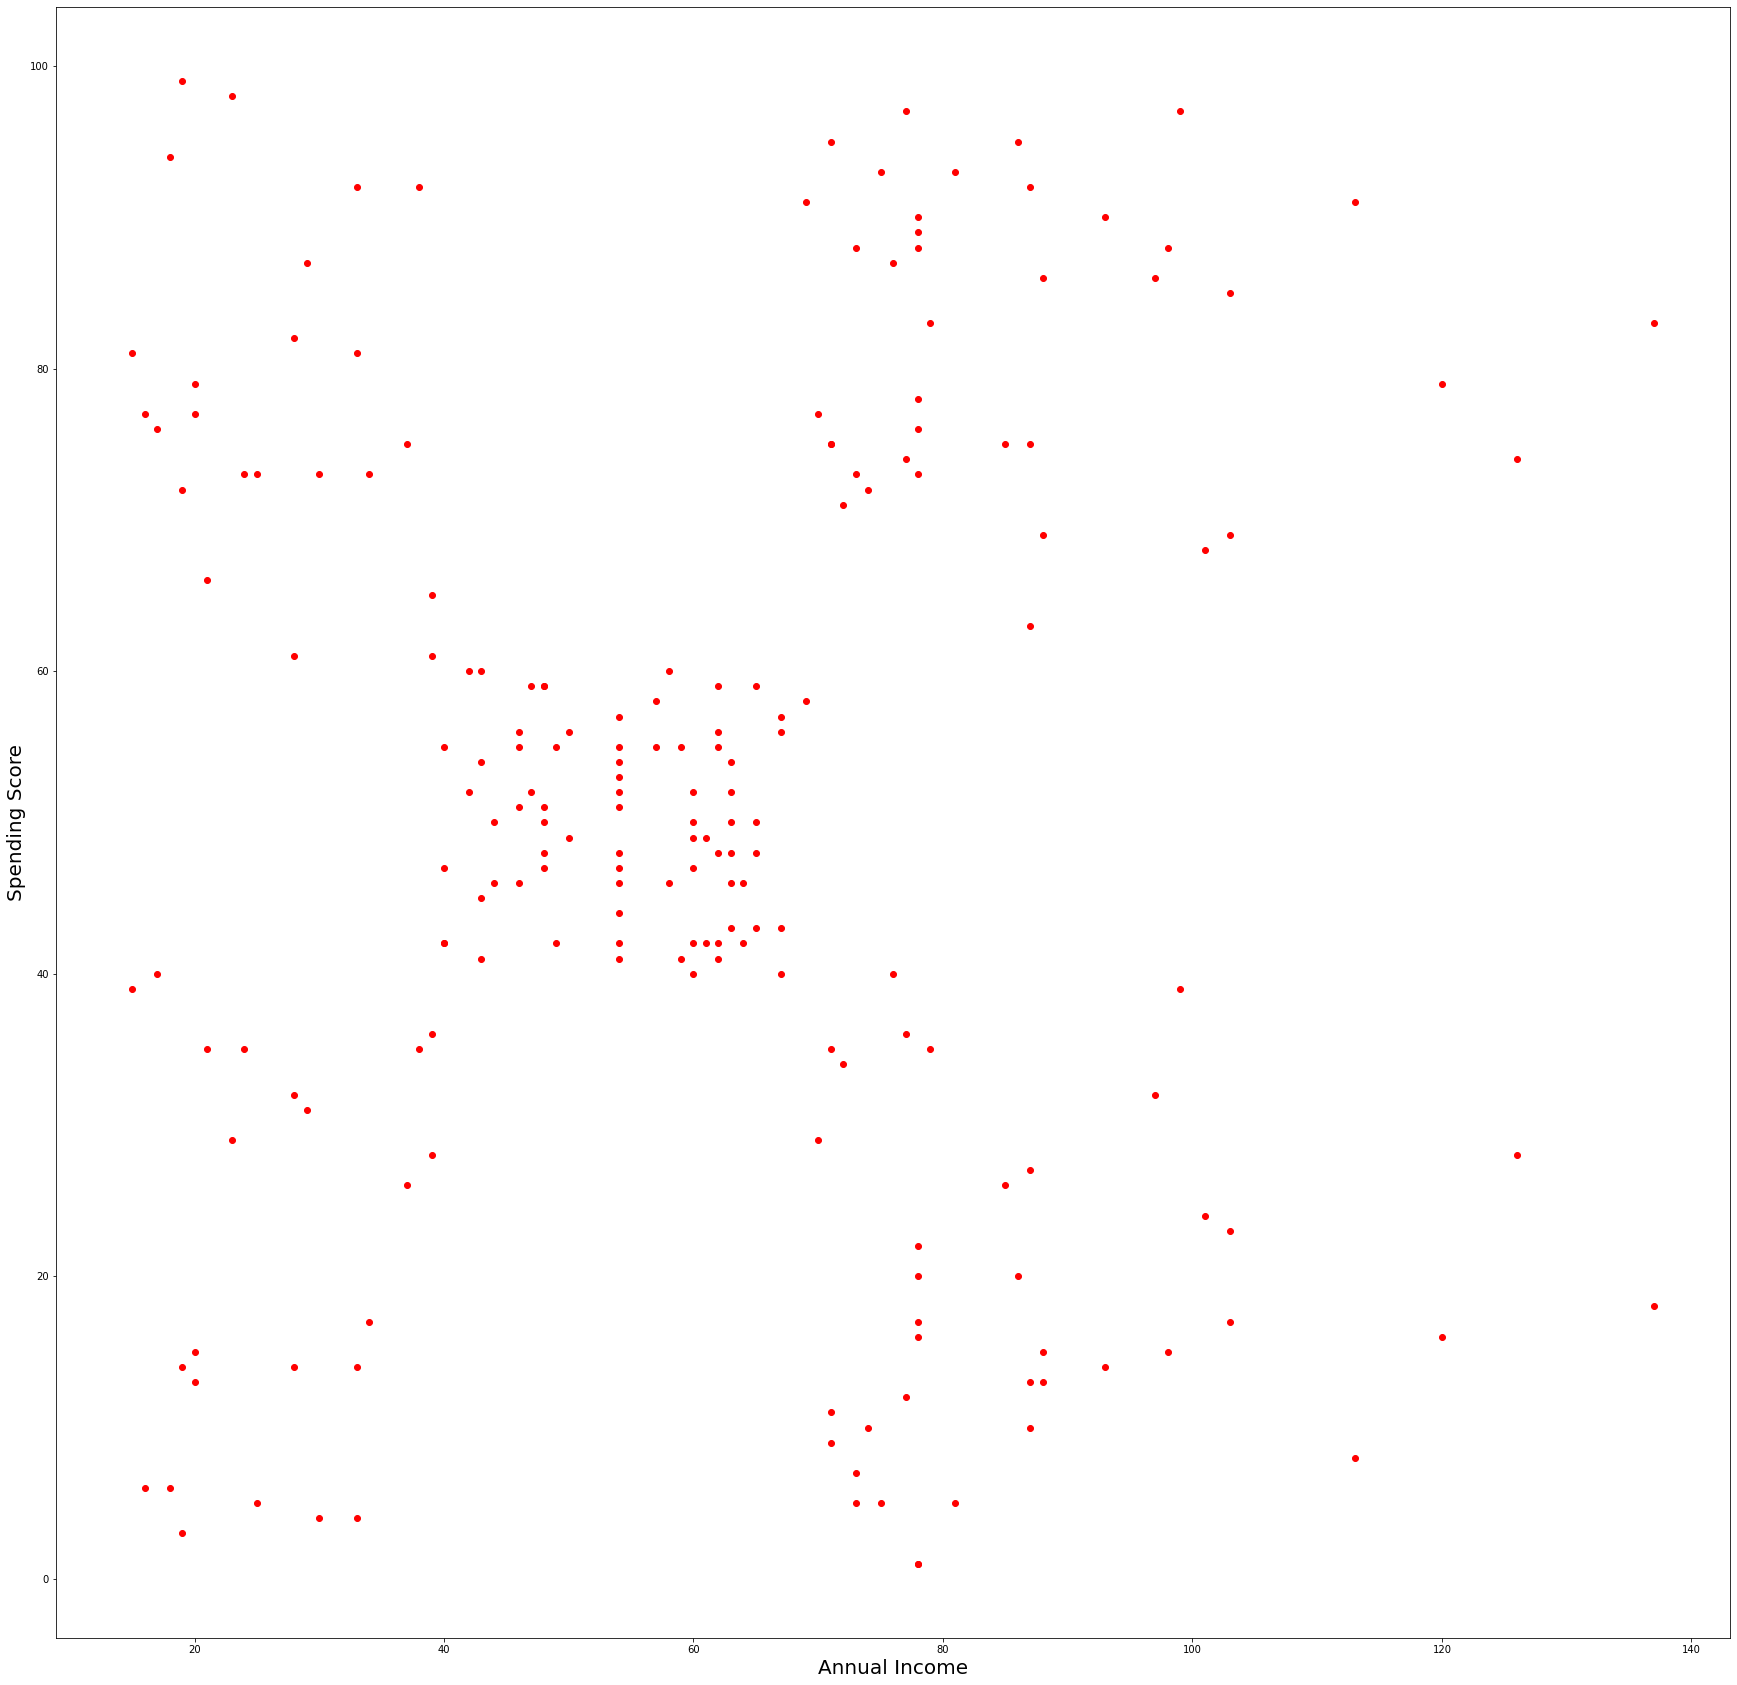

In [ ]:
plt.figure(figsize=(30,30))
plt.scatter(data[:, 3], data[:, 4], color = 'red')
plt.xlabel('Annual Income', size = '20')
plt.ylabel('Spending Score', size = '20')
plt.show()

In [ ]:
def k_means(x, k, t = 1000, eps = 1e-05):
    a, b = x.shape[0], x.shape[1]
    ncent = x[:k,:]
    cent = np.zeros((k,b))
    ndist = a * b * k * np.max(x) ** 2 
    dist = 0
    x = np.expand_dims(x, axis = 1)
    i = 0
    while np.abs(ndist - dist) > eps and i < t:
        cent = ncent
        dist = ndist
        clust = np.argmin(((x - ncent) ** 2).sum(axis = 2), axis = 1) 
        M = np.zeros(a * k * b).reshape(a, k, b)
        M[np.arange(a), clust] = (x - ncent)[np.arange(a),clust] / np.bincount(clust)[clust].reshape(a, 1)
        ncent = cent + M.sum(axis = 0)
        clust = np.argmin(((x - ncent) ** 2).sum(axis = 2),axis = 1) 
        M = np.zeros(a * k * b).reshape(a, k, b)
        M[np.arange(a), clust] = (x - ncent)[np.arange(a), clust]
        ndist = np.sqrt((M ** 2).sum(axis = 2)).sum(axis = 1).mean()
        i = i + 1
    return ncent, ndist

def cluster(data, codebook):
    k = len(codebook)
    d = np.arange(0, k)
    it = np.ones((k, len(data)))
    it[d] = np.arange(0, len(data))
    it = it.astype(int)
    dim1 = (data[it, 0] - codebook[d, 0].reshape(k, 1))**2
    dim2 = (data[it, 1] - codebook[d, 1].reshape(k, 1))**2
    clust_num = ((dim1 + dim2)**(1/2)).argmin(axis = 0).astype(int)
    clusters = []
    for j in range(k):
        clusters.append(data[clust_num == j])
    return clusters

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[2,3]], k)[1])

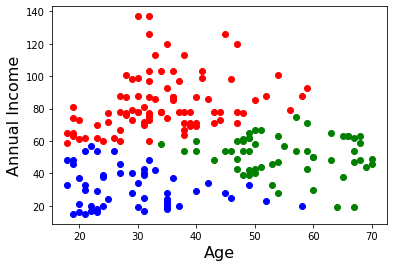

In [ ]:
codebook, distortion = kmeans(data[:,[2,3]], 3)
clusters = cluster(data[:,[2,3]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b')

plt.xlabel('Age', size = '16')
plt.ylabel('Annual Income', size = '16')
plt.show()


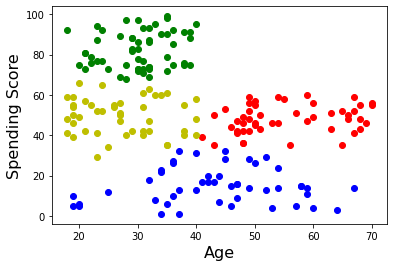

In [ ]:
codebook, distortion = kmeans(data[:,[2,4]], 4)
clusters = cluster(data[:,[2,4]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y')

plt.xlabel('Age', size = '16')
plt.ylabel('Spending Score', size = '16')
plt.show()

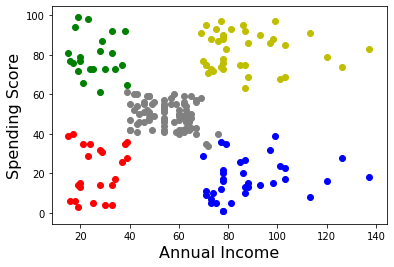

In [ ]:
codebook, distortion = kmeans(data[:,[3,4]], 5)
clusters = cluster(data[:,[3,4]], codebook)
plt.scatter(clusters[0][:,0], clusters[0][:,1], c='r')
plt.scatter(clusters[1][:,0], clusters[1][:,1], c='g')
plt.scatter(clusters[2][:,0], clusters[2][:,1], c='b')
plt.scatter(clusters[3][:,0], clusters[3][:,1], c='y')
plt.scatter(clusters[4][:,0], clusters[4][:,1], c='grey')

plt.xlabel('Annual Income', size = '16')
plt.ylabel('Spending Score', size = '16')
plt.show()
